In [14]:
# Imports
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings

import torch.nn as nn
import torch 
import torch.optim as optim
import torch.utils.data as data_utils
from torchsummary import summary

In [2]:
from os import listdir
from os.path import isfile, join
from pandas import ExcelFile
#Preprocessing
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
names=['session','student_Id', 'exercise', 'activity', 'start_time', 'end_time', 'idle_time', 'mouse_wheel','mouse_wheel_click','moue_click_left','mouse_click_right','mouse_mouvement','keystroke']
mean_std_labels=['mean_idle', 'mean_m_weehl','mean_m_wheel_click','mean_clik_left','mean_click_right', 'mean_m_mouvement','mean_keystroke','std_idle', 'std_m_weehl','std_m_wheel_click','std_clik_left','std_click_right', 'std_mouvement','std_keystroke']
numberofstudents=115
numberofsessions=6
scaled = []
input = [[[0 for i in range(len(mean_std_labels))]for j in range(numberofsessions)]for k in range(numberofstudents)]
unscaled = [[0 for i in range(len(mean_std_labels))]for j in range(numberofstudents)]
scaler = preprocessing.MinMaxScaler()
for session in range(numberofsessions):
    path = "../Data/Processes/Session "+str(session+1)
    files = [f for f in listdir(path) if isfile(join(path, f))]
    for f in files:
        data = pd.read_csv(join(path, f), sep = ',', names=names)
        data = data.iloc[:,6:]
        mean_data = data.mean(axis=0)
        std_data = data.std(axis=0)
        mean_std = pd.concat([mean_data,std_data],axis=0)
        unscaled[int(f)-1]=(mean_std.values.reshape(-1))
    scaled.append(scaler.fit_transform(unscaled))


target_data = pd.read_excel('../dataset/final_grades_transformed.xlsx', engine='openpyxl', sheet_name='Exam (Second time)')
id_list=target_data['StudentID'].values
selected = [[[0 for i in range(len(mean_std_labels))]for j in range(numberofsessions)]for k in range(len(id_list))]
i=0
for student in id_list:
    for session in range(numberofsessions):
        input[student-1][session] = scaled[session][student-1]
        selected[i][session] = scaled[session][student-1]
    i+=1
#print(selected[0])

#Binarize Target

# 1 if greater than 50, 0 otherwise
target_data['TOTAL'] = (target_data['TOTAL'] >= 50.0).astype(int)
reduced_target=target_data[['StudentID','TOTAL']]
#reduced_target.to_csv('../dataset/target1.csv', index=False, sep = ',')

target=target_data['TOTAL'].values

print(target[0])

1


In [29]:
#save redesigned Dataset
mydata=pd.DataFrame(selected)
#mydata.to_csv('../dataset/mydata.csv', index=False, sep = ',')
mydata.tail()

,0,1,2,3,4,5
57,"[0.41688381084455484, 0.07660046056419115, 0.0...","[0.05388974991640218, 0.0, 0.0, 0.587440514569...","[0.15134879326882233, 0.32844619755692767, 0.0...","[0.34893085904651916, 0.6748984779284434, 0.0,...","[0.9999824918999574, 0.0, 0.0, 0.5386267294507...","[0.005435337843407601, 0.0, 0.0, 0.55563325105..."
58,"[0.05933235460134469, 0.061685046941123575, 0....","[0.040000715259110156, 0.0, 0.0, 0.00026526281...","[0.05812972256205163, 0.2471574905441293, 0.09...","[0.1335677724691691, 0.5078646530774191, 0.113...","[0.9999828570253422, 0.0864441816743371, 0.0, ...","[0.015910951826205437, 0.08251844882838916, 0...."
59,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15772917128457067, 0.08354046389310874, 0.0...","[0.027980221835412832, 0.1428909221466388, 0.0...","[0.06391368252785647, 0.29361541276434894, 0.0...","[0.9999826299524787, 0.022217555839020926, 0.0...","[0.013277545672833754, 0.07488608443429125, 0...."
60,"[0.22837787505946677, 0.0, 0.0, 0.497719869706...","[0.14019497316527677, 0.04212248800308887, 0.0...","[0.024869758824111167, 0.0720479738007368, 0.0...","[0.05672761094701254, 0.14804576279960657, 0.0...","[0.9999824815743978, 0.08223475851317903, 0.0,...","[0.0024085270537617547, 0.11688898062385511, 0..."
61,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.05589637622698335, 0.20836548638286578, 0.3...","[0.1284080947715713, 0.42815398886827455, 0.36...","[0.9999846322475521, 0.1267164282493799, 0.118...","[0.12701986598996712, 0.42710805877344615, 0.0..."


In [3]:
X = selected #input

Y= target #reduced_target['TOTAL'].values


#Training data
X_train = X[0:30]
Y_train = Y[0:30]
x_train = torch.FloatTensor(np.array(X_train))
y_train = torch.LongTensor(Y_train)

#Test data
X_test  = X[30:]
Y_test = Y[30:]
x_test = torch.FloatTensor(np.array(X_test))
y_test = torch.LongTensor(Y_test)

#Validation data
X_val  = x_test[40:]
Y_val = y_test[40:]
x_val = torch.FloatTensor(np.array(X_test))
y_val = torch.LongTensor(Y_test)


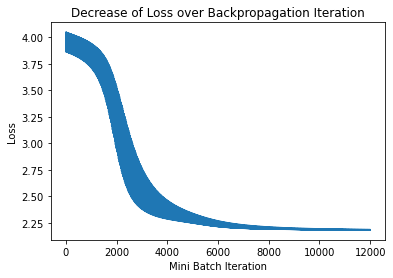

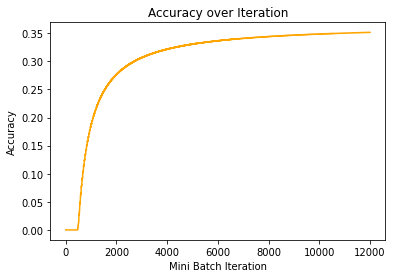

In [13]:
#Hyperparmeters
EPOCHS = 400
IN_SIZE = 14
NUM_SAMPLES = 50
torch.manual_seed(0)




class LSTM_Predictor(nn.Module):
	def __init__(self):
		super(LSTM_Predictor, self).__init__()

		self.lstm = nn.LSTM(
			input_size=14,
			hidden_size=NUM_SAMPLES+1,
			num_layers=2,
			batch_first=True,
		)

	def forward(self, x):
		out, (h_n, h_c) = self.lstm(x, None)
		return out[:, -1, :]	# Return output at last time-step



lstm = LSTM_Predictor()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.00001)
loss_func = nn.CrossEntropyLoss()     
loss_list = []
accuracy_list=[]
num_correct = 0
num_samples = 0
accuracy = 0
lstm.train()

for j in range(EPOCHS):
	optimizer.zero_grad()
	for i, item in enumerate(x_train):
		item = item.unsqueeze(0)
		output = lstm(item)
		#print(output.shape)
		loss = loss_func(output, y_train[i].view(1))
		loss_list.append(loss.item())
		_, predictions = output.max(1)
		num_correct += (predictions == y_train[i]).sum()
		num_samples += predictions.size(0)
		loss.backward()
		optimizer.step()
		accuracy = num_correct / num_samples
		accuracy_list.append(accuracy.item())
	
	#if j % 5 == 0:
		#print('Loss: ', np.average(loss.detach()))



plt.plot(loss_list)
plt.title('Decrease of Loss over Backpropagation Iteration')
plt.xlabel('Mini Batch Iteration')
plt.ylabel('Loss')
plt.show()
plt.plot(accuracy_list, color='orange')
plt.title('Accuracy over Iteration')
plt.xlabel('Mini Batch Iteration')
plt.ylabel('Accuracy')
plt.show()

In [6]:
print(f"Accuracy on training set: {accuracy*100:2f}")

Accuracy on training set: 35.150002


In [11]:

loss_test=[]
# Check accuracy on training & test to see how good our model
def check_accuracy(feature,target, model):
    num_correct = 0
    num_samples = 0

    # Set model to eval
    model.eval()

    with torch.no_grad():
        for i, item in enumerate(feature):
            item = item.unsqueeze(0)
            output = lstm(item)
            loss = loss_func(output, target[i].view(1))
            loss_test.append(loss.item())
            _, predictions = output.max(1)
            num_correct += (predictions == target[i]).sum()
            num_samples += predictions.size(0)
		
        return num_correct / num_samples


print(f"Accuracy on test set: {check_accuracy(x_test,y_test, lstm)*100:2f}")
print(f"Accuracy on train set: {check_accuracy(x_train, y_train, lstm)*100:.2f}")

Accuracy on test set: 53.125000
Accuracy on train set: 36.67


In [10]:
predicted=[]
lstm.eval()
print('Evaluate Testing Set:\n========')
for i, item in enumerate(x_test):

	outp = lstm(item.unsqueeze(0))
	predicted.append(np.argmax(outp.detach()))


from torchmetrics.functional import f1_score
target = y_test
preds = torch.tensor(predicted,dtype=torch.long)
fa_scor=f1_score(preds, target, num_classes=2)
print(f"F1-Score =  {fa_scor:.2f}")

print(f"Predicted Class: {preds}")
print(f"Actual Calss:  {target}")

Evaluate Testing Set:
F1-Score =  0.53
Predicted Class: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
Actual Calss:  tensor([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 1])


In [20]:
# JUST PRINTING MODEL & PARAMETERS 
print(lstm)

print(len(list(lstm.parameters())))
for i in range(len(list(lstm.parameters()))):
    print(list(lstm.parameters())[i].size())

LSTM(
  (lstm): LSTM(14, 51, num_layers=2, batch_first=True)
)
8
torch.Size([204, 14])
torch.Size([204, 51])
torch.Size([204])
torch.Size([204])
torch.Size([204, 51])
torch.Size([204, 51])
torch.Size([204])
torch.Size([204])
